# **Logistic Regression (Multi-class Classification [codebasics])**
**Logistic Regression: Multiclass Classification** [[youtube (15min)]](https://www.youtube.com/watch?v=J5bXOOmkopc)  [[github - code basics]](https://github.com/codebasics/py/blob/master/ML/8_logistic_reg_multiclass/8_logistic_regression_multiclass.ipynb)

In this tutorial we will see how to use logistic regression for multiclass classification.

## Pre-requisite

### directory creation and cleanup, load lib, git clone

In [39]:
import os
import shutil

In [40]:
SRC_LOC='/content/py/ML/8_logistic_reg_multiclass/'
SRC_FILES_DIRS = SRC_LOC + '*'
DST_LOC='/content/'
WORKING_DIR=DST_LOC+'02_logistic_regression/'
!python --version


Python 3.7.12


In [41]:
shutil.rmtree('/content')
os.mkdir('/content')
os.mkdir(WORKING_DIR)

os.chdir("/content/")
CWD = os.getcwd()
print(f"CWD={CWD}")

if os.path.isdir('py'):
  shutil.rmtree('py')

!git clone https://github.com/codebasics/py

os.system('cp -R ' + SRC_FILES_DIRS + ' ' + WORKING_DIR) 

os.chdir(WORKING_DIR)

CWD=/content
Cloning into 'py'...
remote: Enumerating objects: 2873, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 2873 (delta 33), reused 52 (delta 18), pack-reused 2801
Receiving objects: 100% (2873/2873), 196.64 MiB | 33.03 MiB/s, done.
Resolving deltas: 100% (1112/1112), done.
Checking out files: 100% (1388/1388), done.


In [42]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Load Digits Data, showing some digits

<Figure size 432x288 with 0 Axes>

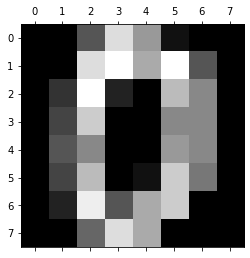

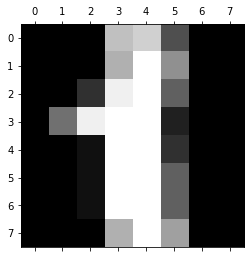

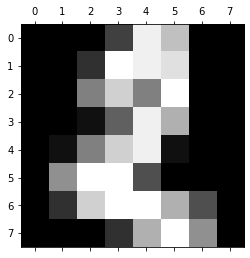

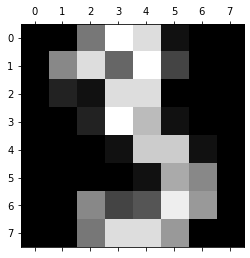

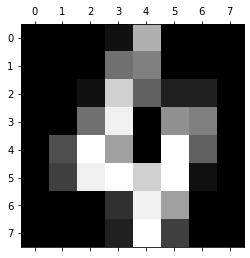

In [43]:
from sklearn.datasets import load_digits
%matplotlib inline
import matplotlib.pyplot as plt
digits = load_digits()


plt.gray() 
for i in range(5):
  #plt.subplot(1,5,i+1)
  plt.matshow(digits.images[i]) 
  #plt.show() 

#plt.show()  

In [44]:
print(f"dir(digits) = \n{dir(digits)}")
print(f"digits.data[0] = \n{digits.data[0]}")
#dir(digits)
#digits.data[0]

dir(digits) = 
['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']
digits.data[0] = 
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


## **logistic regression model -- sklearn: creation and training**

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#model = LogisticRegression()
#model = LogisticRegression(solver='lbfgs', max_iter=1000)
model = LogisticRegression(max_iter=10000)

X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.2)

model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## **Measure accuracy of the model**

In [46]:
model.score(X_test, y_test)

0.9555555555555556

In [47]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

## **Confusion Matrix**

In [48]:
y_predicted = model.predict(X_test)

y_predicted

array([9, 3, 2, 4, 5, 6, 4, 4, 5, 2, 5, 4, 0, 3, 3, 1, 3, 4, 6, 8, 9, 5,
       4, 7, 3, 3, 5, 7, 2, 3, 1, 0, 2, 2, 6, 1, 6, 6, 8, 8, 8, 6, 7, 2,
       6, 1, 8, 0, 8, 7, 0, 2, 4, 2, 4, 1, 0, 1, 3, 4, 7, 6, 5, 0, 9, 1,
       4, 2, 8, 4, 5, 5, 5, 9, 6, 9, 4, 7, 2, 5, 1, 7, 6, 6, 1, 5, 7, 8,
       0, 2, 4, 8, 7, 2, 4, 0, 1, 5, 3, 2, 5, 3, 9, 1, 6, 7, 1, 9, 0, 8,
       5, 6, 5, 5, 0, 0, 1, 8, 7, 3, 8, 8, 8, 2, 2, 5, 7, 3, 2, 1, 3, 4,
       8, 9, 7, 3, 7, 9, 4, 0, 1, 1, 1, 9, 4, 1, 4, 4, 3, 1, 5, 8, 7, 1,
       4, 8, 0, 9, 7, 0, 2, 0, 6, 8, 4, 0, 4, 5, 7, 1, 4, 0, 8, 1, 0, 7,
       1, 4, 9, 4, 6, 7, 7, 0, 6, 0, 0, 5, 3, 9, 9, 6, 8, 4, 9, 4, 0, 1,
       0, 2, 1, 3, 2, 2, 6, 5, 2, 1, 0, 9, 9, 9, 9, 9, 0, 4, 7, 2, 2, 3,
       4, 8, 0, 0, 3, 2, 6, 6, 1, 5, 2, 3, 9, 4, 6, 7, 5, 7, 0, 1, 5, 9,
       1, 9, 8, 4, 3, 1, 8, 8, 9, 8, 2, 3, 2, 2, 8, 8, 7, 2, 7, 0, 4, 1,
       9, 8, 6, 1, 3, 5, 1, 9, 2, 0, 9, 6, 6, 5, 5, 3, 7, 9, 4, 5, 6, 4,
       2, 0, 1, 8, 7, 6, 0, 9, 5, 1, 3, 2, 4, 3, 1,

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 42,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 38,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 37,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 36,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1, 31,  0,  1,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 30,  1,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 28,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  1,  1, 36]])

Text(69.0, 0.5, 'Truth')

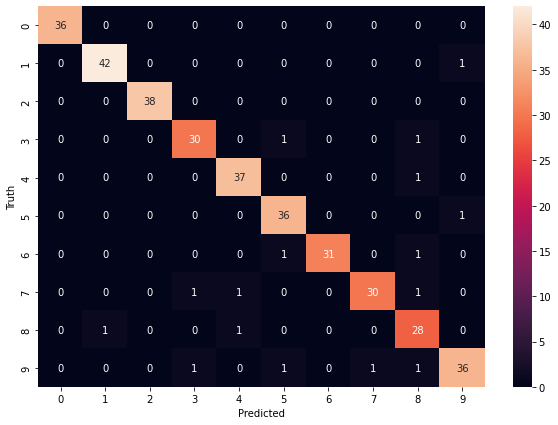

In [50]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Exercise



Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1.  Sepal Length
2.  Sepal Width
3.  Petal Length
4.  Petal Width

Using above 4 features you will clasify a flower in one of the three categories,

1.  Setosa
2.  Versicolour
3.  Virginica

<img src="https://github.com/codebasics/py/raw/master/ML/8_logistic_reg_multiclass/iris_petal_sepal.png" width="300">